## Data  Visualization

### Darkhorse Analytics

- Less is more effective
- Less is more attractive
- Less is more impactful

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt

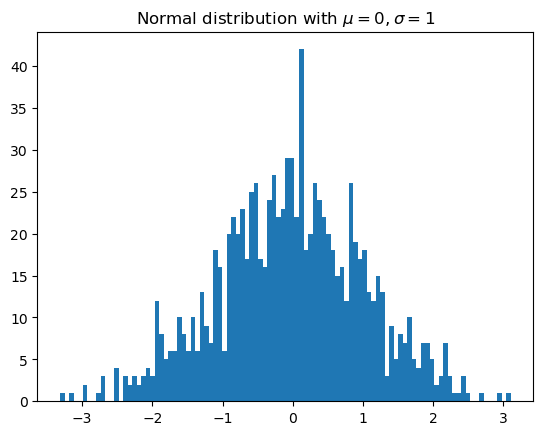

In [4]:
x = np.random.randn(1000)

plt.hist(x, 100)
plt.title(r"Normal distribution with $\mu=0, \sigma=1$")
plt.savefig("matplotlib_histogram.png")
plt.show()

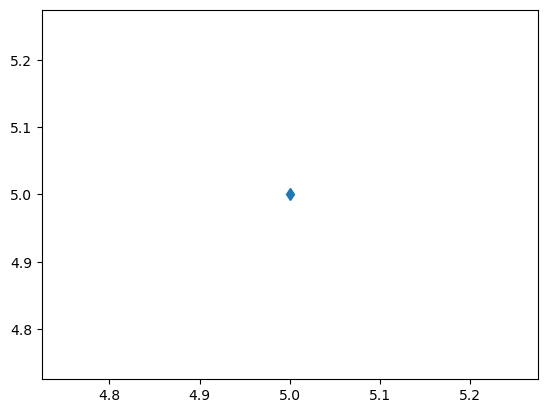

In [5]:
plt.plot(5, 5, 'd')
plt.show()

### Matplotlib
- General purpose plotting library
- Can create variety of plots


**Matplotlib Magic Functions**

- **%matplotlib inline**
    - output in same window
    - can't modify after created
  
- **%matplotlib notebook**
    - output in new window
    - can be modify after created

### Pandas
- Users employ it for data manipulation
- Its functions are built on Matplotlib

### Seaborn
- Great option for specialized stastical visualization
- It offers a variety of stylish plots

### Folium
- Excelent option for Geospatial data visualization
- Builds interactive and customizable maps

### Plotly
- Has highly interactive plots and dashboards
- Can create a vareity of plots

### Line plots
A line plot is a type of plot that displays information as a series of data points connected by straight line.
1. Visulize trends and changes over time
2. Showing relationships
3. Compare multiple data series
4. Highlighting sudden changes or anamolies

In [ ]:
db_file = './Canada.xlsx'

In [ ]:
df_canada = pd.read_excel(
    db_file,
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2,
    engine='openpyxl')

In [ ]:
# df_canada = pd.read_excel("./Canada.xlsx", engine='openpyxl')
df_canada.head()

In [ ]:
years = list(map(str, range(1980, 2014)))

df_canada[2013].plot(kind="line")
# df_canada.loc['Haiti', years].plot(kind='line')
plt.show()

# Week 2

### Area Plot

## Histogram
A Histogram is a way of representing the frequency distribution of a variable

In [ ]:
df_canada[2013].plot(kind='hist')
plt.title("Histogram of Immigrants from 195 countries in 2013")
plt.ylabel("Number of countries")
plt.xlabel("Number of Immigrants")

plt.show()

# Week 3

## Folium

In [ ]:
# !pip install folium
import folium

In [ ]:
world_map = folium.Map()

In [ ]:
world_map

In [ ]:
pak_map = folium.Map(
            location=[30.3753, 69.3451],
            zoom_start = 4,
            )

pak_map

In [ ]:
pak_map = folium.Map(
            location=[30.3753, 69.3451],
            zoom_start=4,
            tiles='Stamen Terrain'
            )
pak_map

In [ ]:
pak_map = folium.Map(
            location=[30.3753, 69.3451],
            zoom_start=4,
            tiles='Stamen Toner'
            )
pak_map

# Maps with Markers <a id="6"></a>


### Label with Marker
A choropleth map is a thematic map in which areas are shaded or patterned in proportion to the measurement of the statistical variable being displayed on the map, such as population density or per capita income. 

In [ ]:
data = 'Police_Department_Incidents_-_Previous_Year__2016_.csv'

In [ ]:
df = pd.read_csv(data)

In [ ]:
df.head()

In [ ]:
df.shape

So the dataframe consists of 150,500 crimes, which took place in the year 2016. In order to reduce computational cost, let's just work with the first 100 incidents in this dataset.


In [ ]:
df_incidents = df.iloc[0:100, : ]

In [ ]:
df_incidents.head()

In [ ]:
df.shape

In [ ]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [ ]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sanfran_map

Now let's superimpose the locations of the crimes onto the map. The way to do that in **Folium** is to create a *feature group* with its own features and style and then add it to the `sanfran_map`.

In [ ]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)

You can also add some pop-up text that would get displayed when you hover over a marker. Let's make each marker display the category of the crime when hovered over.

In [ ]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)    
    
# add incidents to map
sanfran_map.add_child(incidents)

The other proper remedy is to group the markers into different clusters. Each cluster is then represented by the number of crimes in each neighborhood. These clusters can be thought of as pockets of San Francisco which you can then analyze separately.

To implement this, we start off by instantiating a *MarkerCluster* object and adding all the data points in the dataframe to this object.


In [ ]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

# Choropleth Maps <a id="8"></a>

A `Choropleth` map is a thematic map in which areas are shaded or patterned in proportion to the measurement of the statistical variable being displayed on the map, such as population density or per-capita income. The choropleth map provides an easy way to visualize how a measurement varies across a geographic area, or it shows the level of variability within a region. Below is a `Choropleth` map of the US depicting the population by square mile per state.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%205/images/2000_census_population_density_map_by_state.png" width="600"> 


In [ ]:
file='./Canada.0.xlsx'
df_can = pd.read_excel(
    file,
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2,
    engine='openpyxl')

In [ ]:
df_can.shape

In [ ]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

In [ ]:
df_can.head()

In order to create a `Choropleth` map, we need a GeoJSON file that defines the areas/boundaries of the state, county, or country that we are interested in. In our case, since we are endeavoring to create a world map, we want a GeoJSON that defines the boundaries of all world countries. For your convenience, we will be providing you with this file, so let's go ahead and load it.

In [ ]:
world_geo='./world_countries.json'

In [ ]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map

As per our `Choropleth` map legend, the darker the color of a country and the closer the color to red, the higher the number of immigrants from that country. Accordingly, the highest immigration over the course of 33 years (from 1980 to 2013) was from China, India, and the Philippines, followed by Poland, Pakistan, and interestingly, the US.


Notice how the legend is displaying a negative boundary or threshold. Let's fix that by defining our own thresholds and starting with 0 instead of -6,918!


In [ ]:
# create a numpy array of length 6 and has linear spacing from the minimum total immigration to the maximum total immigration
threshold_scale = np.linspace(df_can['Total'].min(),
                              df_can['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True
)
world_map

# Week 4

## Dashboard

- Real-time visuals simplify business moving parts
- Display Key Performance Indicators (KPI)
- Help businesses by providing the big picture
- Best Dashboard answer important business questions

### Web-based dashboarding
1. Plotly | Dash - run on top of Flask, Plotly.js and React.js
2. Panel - run in Jupyter and as a standalone app. (on top of bokeh)
3. voila - convert juptyter notebook to standalone app.
4. Streamlit - turn data scripts into shareable web apps

### Dashboard Tools
1. bokeh
2. ipywidgets
3. matplotlib
4. bowtie
5. flask

### Plotly
- Interactive open-source library
- Supports over 40 unique chart types
- Includes various types of charts
    - Visulization can be:
        - Displayed in Jupyter Notebook
        - Saved to HTML files
        - Used in developing Python-built web applications
        
#### Plotly Graph objects
- low-level interface to figures, traces, and layout.
#### Plotly Express
- high-level wrapper for plotly. It uses graph objects internally.

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
# Set random seed for reproduciblity
np.random.seed(10)
x = np.arange(12)
# Create random y values
y = np.random.randint(50, 500, size=12)

In [ ]:
fig = go.figure(data=go.Scatter(x=x, y=y))

In [ ]:
# Using PRotly.express
fig = px.line(x=x, y=y, title='Simple Line Plot', labels=dict(x='Month', y='Sales'))
fig.show()

### Dash
- Open-source User Interface Python library from Plotly
- Easy to build GUI
- Declarative and Reactive
- Rendered in web browser and can be deployed to servers
- Inherently cross-platform and mobile ready

In [ ]:
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import input, output

In [ ]:
# Read the data
airline_data = pd.read_csv('./airline_2m.csv',
                          encoding='ISO-8859-1',
                          dtype{'Div1Airport': str,
                                'Div1TaiNum': str,
                                'Div2Airport': str,
                                'Div2TaiNum': str
                               })

app = dash.Dash()

# Design dash app layout
app.layout = html.Div(children=[html.h1('Airline Dashboard',
                                        style={'TextAlign': 'center', 'color': colors['text'],
                                               'font-size': 40}),
                                html.Div(['input: ', dcc.Input(id='input_yr', value='2010',
                                type='number', style={'height': '50px', 'font-size'=35}),],
                                        style={'font-size': 40}),
                                html.Br(),
                                html.Br(),
                                html.Div(dcc.Graph(id='bar-plot')),
                               ])

@app.callback( Output(component_id='bar-plot', component_property='figure'),
               Input(component_id='input-yr', component_property='value'))

def get_graph(entered_year):
    # select data
    df = airline_data[airline_data['Year'] ==int(entered_year)]
    # Top 10 airline carrier in terms of number of flights
    g1 = df.groupby(['Reporting_Airline'])['Flights'].sum().nlargest(10).reset_index()
    # Plot the graph
    fig1 = px.bar(g1, x='Reporting_Airline', y='Flights', title='Top 10 airline carrier in year' 
                  + str(entered_year) + 'in terms of number of flights')
    fig1.update_layout()
    return fig1